<a href="https://colab.research.google.com/github/Marco-barthem/Data-Mining-1/blob/main/EstudoExercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!python -m spacy download pt_core_news_sm

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import RSLPStemmer
import spacy
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Importando o DataSET

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Marco-barthem/Data-Mining-1/refs/heads/main/sentiment-analysis.csv',
                 sep =',',
                 quotechar='"',
                 engine= 'python')
df[['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']] = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand = True)

In [4]:
df.drop(columns = ['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], inplace = True)

In [7]:
df_estudo = df[['Text','Date/Time','Location']]
df_estudo.sample(3)

,Text,Date/Time,Location
40,"""This song always puts me in a good mood. It's...",2023-07-10 14:20:05,Berlin
79,"""I love this product!""",2023-06-15 09:23:14,New York
95,"""I had an incredible experience at the theme p...",2023-07-03 14:40:05,Orlando


## Pre - processamento

In [ ]:
tokenizer = ToktokTokenizer()
stopwords_en = set(stopwords.words('english'))
stopwords_en.update(['i','the','this','it'])

In [ ]:
tokens_totais = []
for feedback in df['Text']:
  tokens = tokenizer.tokenize(feedback)
  tokens_filtrados = [token.lower() for token in tokens
    if token.lower() not in stopwords_en and token.isalpha()]
  tokens_totais.extend(tokens_filtrados)

frequencia = Counter(tokens_totais)
top_10 = frequencia.most_common(10)
print(top_10)

[('customer', 15), ('product', 13), ('service', 12), ('website', 11), ('terrible', 10), ('disappointed', 10), ('food', 8), ('restaurant', 8), ('experience', 7), ('movie', 6)]


In [ ]:
from nltk.stem import RSLPStemmer

# Inicializa o stemmer para português
stemmer = RSLPStemmer()

# Dicionário para armazenar o stem e a contagem agregada
stemmed_counts = {}

for word,count in top_20.items():
  stem=stemmer.stem(word)
  stemmed_counts[stem] = stemmed_counts.get(stem, 0) + count

print(stemmed_counts)


{'custom': 15, 'product': 13, 'serv': 12, 'websit': 11, 'terribl': 10, 'disappointed': 10, 'food': 8, 'restaurant': 8, 'experienc': 7, 'movi': 6, 'quality': 6, 'amazing': 5, 'incredibl': 5, 'book': 5, 'highly': 5, 'back': 5, 'lov': 4, 'support': 4, 'best': 4, 'stop': 4}


In [ ]:
# Dicionário para armazenar os lemas e a contagem agregada
lemmatized_counts = {}

# Itera sobre as palavras do dicionário
for word, count in top_20.items():
    # Processa a palavra com o spaCy
    doc = nlp(word)
    # Como estamos processando uma única palavra, pegamos o lema do primeiro token
    lemma = doc[0].lemma_
    # Agrega a contagem para o lema correspondente
    lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts)

{'customer': 15, 'product': 13, 'service': 12, 'website': 11, 'terrible': 10, 'disappoint': 10, 'food': 8, 'restaurant': 8, 'experience': 7, 'movie': 6, 'quality': 6, 'amazing': 5, 'incredible': 5, 'book': 5, 'highly': 5, 'back': 5, 'love': 4, 'support': 4, 'well': 4, 'stop': 4}


In [2]:
!pip install -q translate
!pip install -q nltk
!pip install -q wordcloud
!pip install -q plotly
!pip install -q googletrans
!pip install -q deep_translator

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from translate import Translator
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from deep_translator import GoogleTranslator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import string

# Baixar o dicionário do VADER para sentiment analysis
nltk.download('vader_lexicon')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Analise sentimento

In [16]:
def cleaning_text (text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

df_estudo['Text'] = df_estudo['Text'].apply(cleaning_text)
df_estudo
sia = SentimentIntensityAnalyzer()
def get_polarity(text):

  return sia.polarity_scores(text)['compound']

df_estudo['polarity'] = df_estudo['Text'].apply(get_polarity)
df_estudo


<ipython-input-16-ecddb7b6808c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estudo['Text'] = df_estudo['Text'].apply(cleaning_text)
<ipython-input-16-ecddb7b6808c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estudo['polarity'] = df_estudo['Text'].apply(get_polarity)


,Text,Date/Time,Location,polarity,sentiment
0,i love this product,2023-06-15 09:23:14,New York,0.6369,positive
1,the service was terrible,2023-06-15 11:45:32,Los Angeles,-0.4767,Neutral
2,this movie is amazing,2023-06-15 14:10:22,London,0.5859,Neutral
3,im so disappointed with their customer support,2023-06-15 17:35:11,Toronto,-0.1761,negative
4,just had the best meal of my life,2023-06-16 08:50:59,Paris,0.6369,positive
...,...,...,...,...,...
91,just had the most amazing vacation i cant wait...,2023-07-02 18:01:23,Sydney,0.6240,positive
92,the food at this restaurant was awful never go...,2023-07-02 20:45:37,Mumbai,-0.4588,negative
93,i cant stop listening to this song its my new ...,2023-07-03 09:17:52,Berlin,0.5978,Neutral
94,their website is so confusing and poorly designed,2023-07-03 11:59:18,Toronto,-0.3593,Neutral


In [17]:
def get_sentiment(polarity):
  if polarity > 0.05:
    return 'positive'
  elif polarity < -0.05:
    return 'negative'
  else:
    return 'Neutral'

df_estudo['sentiment'] = df_estudo['polarity'].apply(get_sentiment)
df_estudo

<ipython-input-17-2bb8ab60337d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estudo['sentiment'] = df_estudo['polarity'].apply(get_sentiment)


,Text,Date/Time,Location,polarity,sentiment
0,i love this product,2023-06-15 09:23:14,New York,0.6369,positive
1,the service was terrible,2023-06-15 11:45:32,Los Angeles,-0.4767,negative
2,this movie is amazing,2023-06-15 14:10:22,London,0.5859,positive
3,im so disappointed with their customer support,2023-06-15 17:35:11,Toronto,-0.1761,negative
4,just had the best meal of my life,2023-06-16 08:50:59,Paris,0.6369,positive
...,...,...,...,...,...
91,just had the most amazing vacation i cant wait...,2023-07-02 18:01:23,Sydney,0.6240,positive
92,the food at this restaurant was awful never go...,2023-07-02 20:45:37,Mumbai,-0.4588,negative
93,i cant stop listening to this song its my new ...,2023-07-03 09:17:52,Berlin,0.5978,positive
94,their website is so confusing and poorly designed,2023-07-03 11:59:18,Toronto,-0.3593,negative


In [18]:
df_estudo['sentiment'].value_counts()

,count
sentiment,
positive,48
negative,38
Neutral,10


In [21]:
df_estudo["Date"] = pd.to_datetime(df_estudo["Date/Time"]).dt.date
df_estudo

<ipython-input-21-dcb34dc3c042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estudo["Date"] = pd.to_datetime(df_estudo["Date/Time"]).dt.date


,Text,Date/Time,Location,polarity,sentiment,Date
0,i love this product,2023-06-15 09:23:14,New York,0.6369,positive,2023-06-15
1,the service was terrible,2023-06-15 11:45:32,Los Angeles,-0.4767,negative,2023-06-15
2,this movie is amazing,2023-06-15 14:10:22,London,0.5859,positive,2023-06-15
3,im so disappointed with their customer support,2023-06-15 17:35:11,Toronto,-0.1761,negative,2023-06-15
4,just had the best meal of my life,2023-06-16 08:50:59,Paris,0.6369,positive,2023-06-16
...,...,...,...,...,...,...
91,just had the most amazing vacation i cant wait...,2023-07-02 18:01:23,Sydney,0.6240,positive,2023-07-02
92,the food at this restaurant was awful never go...,2023-07-02 20:45:37,Mumbai,-0.4588,negative,2023-07-02
93,i cant stop listening to this song its my new ...,2023-07-03 09:17:52,Berlin,0.5978,positive,2023-07-03
94,their website is so confusing and poorly designed,2023-07-03 11:59:18,Toronto,-0.3593,negative,2023-07-03


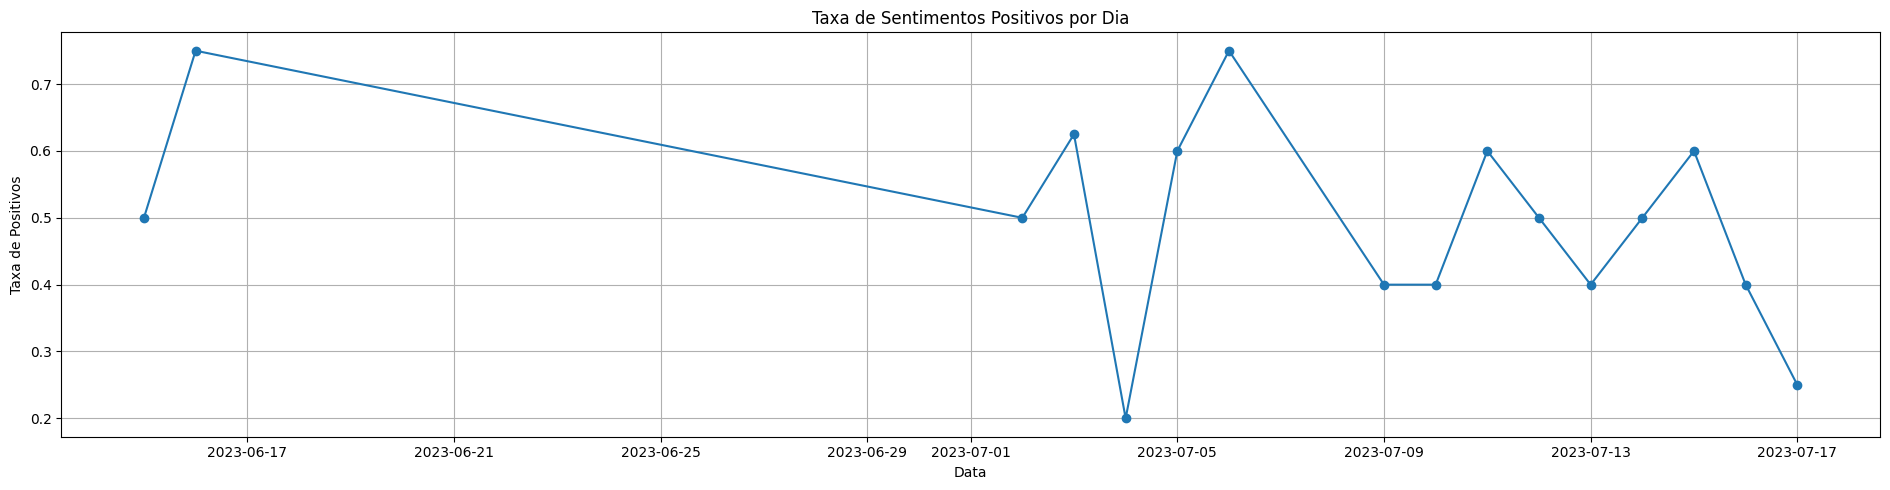

In [26]:
df_grouped = df_estudo.groupby('Date').agg(
    total = ('sentiment', 'count'),
    positive = ('sentiment', lambda x: (x == 'positive').sum()),
)

df_grouped['taxa_positivos'] = df_grouped['positive'] / df_grouped['total']

plt.figure(figsize=(19, 5))
plt.plot(df_grouped.index, df_grouped['taxa_positivos'], marker='o')
plt.title('Taxa de Sentimentos Positivos por Dia')
plt.xlabel('Data')
plt.ylabel('Taxa de Positivos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Filtrar apenas os depoimentos negativos em português
depoimentos_negativos = df_estudo[df_estudo["sentiment"] == "negative"]["Text"]
stop_words = set(stopwords.words("english"))
# Função para processar e extrair palavras-chave
def extract_keywords(texts):
    all_words = []

    for text in texts:
        words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()  # Remover pontuação e dividir palavras
        words = [word for word in words if word not in stop_words]  # Remover stopwords
        all_words.extend(words)

    return Counter(all_words).most_common(10)  # Retornar as 10 palavras mais comuns

# Obter as principais causas dos depoimentos negativos
top_negative_causes = extract_keywords(depoimentos_negativos)

# Exibir o resultado
print("Principais causas dos depoimentos negativos:")
for word, count in top_negative_causes:
    print(f"{word}: {count} vezes")

Principais causas dos depoimentos negativos:
terrible: 10 vezes
disappointed: 10 vezes
customer: 9 vezes
service: 8 vezes
im: 8 vezes
product: 7 vezes
support: 6 vezes
food: 6 vezes
restaurant: 6 vezes
experience: 6 vezes


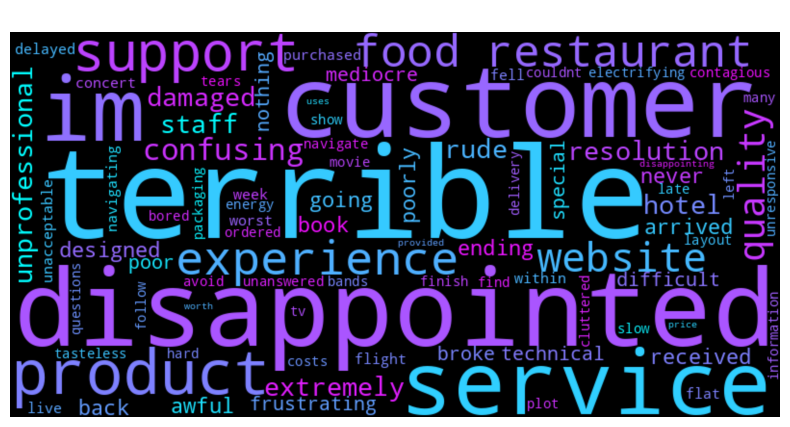

In [29]:
# Filtrar apenas os depoimentos negativos em português
depoimentos_negativos = df_estudo[df_estudo["sentiment"] == "negative"]["Text"]

# Concatenar todos os depoimentos em um único texto
text = " ".join(depoimentos_negativos)

# Remover pontuação e stopwords
words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
filtered_text = " ".join([word for word in words if word not in stop_words])

# Criar a nuvem de palavras com fundo preto
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",  # Fundo preto
    colormap="cool"  # Cores em tons de azul
).generate(filtered_text)

# Exibir o Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="quadric")
plt.axis("off")  # Esconder eixos
plt.title("Palavras mais comuns nos depoimentos negativos", fontsize=12, color="white")  # Título branco para contraste
plt.show()